In [1]:
import pandas as pd
import glob
import os


complaints_subcategory = pd.read_csv("complaints-by-subcategory.csv")
iata_icao = pd.read_csv("iata-icao.csv")
complaints_category = pd.read_csv("complaints-by-category.csv")
complaints_airport = pd.read_csv("complaints-by-airport.csv")


In [2]:
complaints_subcategory.head(5)

pdf_report_date airport                           category  \
0         2019-02     ABE         Hazardous Materials Safety   
1         2019-02     ABE  Mishandling of Passenger Property   
2         2019-02     ABE         Hazardous Materials Safety   
3         2019-02     ABE  Mishandling of Passenger Property   
4         2019-02     ABE         Hazardous Materials Safety   

                              subcategory year_month  count  \
0                                 General    2015-01      0   
1  Damaged/Missing Items--Checked Baggage    2015-01      0   
2                                 General    2015-02      0   
3  Damaged/Missing Items--Checked Baggage    2015-02      0   
4                                 General    2015-03      0   

                           clean_cat                             clean_subcat  \
0         Hazardous Materials Safety                                  General   
1  Mishandling of Passenger Property  *Damaged/Missing Items--Checked Baggage   
2         Hazardous Materials Safety                                  General   
3  Mishandling of Passenger Property  *Damaged/Missing Items--Checked Baggage   
4         Hazardous Materials Safety                                  General   

  clean_cat_status clean_subcat_status  is_category_prefix_removed  
0         original            original                       False  
1         original            original                       False  
2         original            original                       False  
3         original            original                       False  
4         original            original                       False

In [3]:

complaints_subcategory.isnull().sum()


pdf_report_date                   0
airport                       13464
category                          0
subcategory                       0
year_month                        0
count                             0
clean_cat                         0
clean_subcat                      0
clean_cat_status                  0
clean_subcat_status               0
is_category_prefix_removed        0
dtype: int64

In [4]:
complaints_subcategory = complaints_subcategory.dropna()
#airport is the controlling variable so I need to remove the variables that have that missing 

In [5]:
iata_icao.head(5)

country_code region_name iata  icao                          airport  \
0           AE    Abu Zaby  AAN  OMAL     Al Ain International Airport   
1           AE    Abu Zaby  AUH  OMAA  Abu Dhabi International Airport   
2           AE    Abu Zaby  AYM   NaN         Yas Island Seaplane Base   
3           AE    Abu Zaby  AZI  OMAD      Al Bateen Executive Airport   
4           AE    Abu Zaby  DHF  OMAM               Al Dhafra Air Base   

   latitude  longitude  
0   24.2617    55.6092  
1   24.4330    54.6511  
2   24.4670    54.6103  
3   24.4283    54.4581  
4   24.2482    54.5477

In [6]:
merged_complaints_subcat = complaints_subcategory.merge(
    iata_icao,
    left_on="airport",   # column in complaints_subcategory
    right_on="iata",     # column in iata_icao
    how="left"           # keeps all complaints rows
)

In [7]:
merged_complaints_subcat.head(2)

pdf_report_date airport_x                           category  \
0         2019-02       ABE         Hazardous Materials Safety   
1         2019-02       ABE  Mishandling of Passenger Property   

                              subcategory year_month  count  \
0                                 General    2015-01      0   
1  Damaged/Missing Items--Checked Baggage    2015-01      0   

                           clean_cat                             clean_subcat  \
0         Hazardous Materials Safety                                  General   
1  Mishandling of Passenger Property  *Damaged/Missing Items--Checked Baggage   

  clean_cat_status clean_subcat_status  is_category_prefix_removed  \
0         original            original                       False   
1         original            original                       False   

  country_code   region_name iata  icao                            airport_y  \
0           US  Pennsylvania  ABE  KABE  Lehigh Valley International Airport   
1           US  Pennsylvania  ABE  KABE  Lehigh Valley International Airport   

   latitude  longitude  
0   40.6521   -75.4408  
1   40.6521   -75.4408

In [8]:
complaints_category.isnull().sum()

pdf_report_date        0
airport             4042
category               0
year_month             0
count                  0
clean_cat              0
clean_cat_status       0
dtype: int64

In [9]:
complaints_category=complaints_category.dropna()
#airport is the controlling variable so I need to remove the variables that have that missing 

In [10]:
merged_complaints_cat = complaints_category.merge(
    iata_icao,
    left_on="airport",   # column in complaints_subcategory
    right_on="iata",     # column in iata_icao
    how="left"           # keeps all complaints rowscomplaints_airport
)

In [11]:
merged_complaints_cat.head(2)

pdf_report_date airport_x                           category year_month  \
0         2019-02       ABE         Hazardous Materials Safety    2015-01   
1         2019-02       ABE  Mishandling of Passenger Property    2015-01   

   count                          clean_cat clean_cat_status country_code  \
0      0         Hazardous Materials Safety         original           US   
1      0  Mishandling of Passenger Property         original           US   

    region_name iata  icao                            airport_y  latitude  \
0  Pennsylvania  ABE  KABE  Lehigh Valley International Airport   40.6521   
1  Pennsylvania  ABE  KABE  Lehigh Valley International Airport   40.6521   

   longitude  
0   -75.4408  
1   -75.4408

In [12]:
complaints_airport.isnull().sum()

pdf_report_date      0
airport            109
year_month           0
count                0
dtype: int64

In [13]:
complaints_airport=complaints_airport.dropna()
#airport is the controlling variable so I need to remove the variables that have that missing 

In [14]:
merged_complaints_airport = complaints_airport.merge(
    iata_icao,
    left_on="airport",   # column in complaints_subcategory
    right_on="iata",     # column in iata_icao
    how="left"           # keeps all complaints rowscomplaints_airport
)

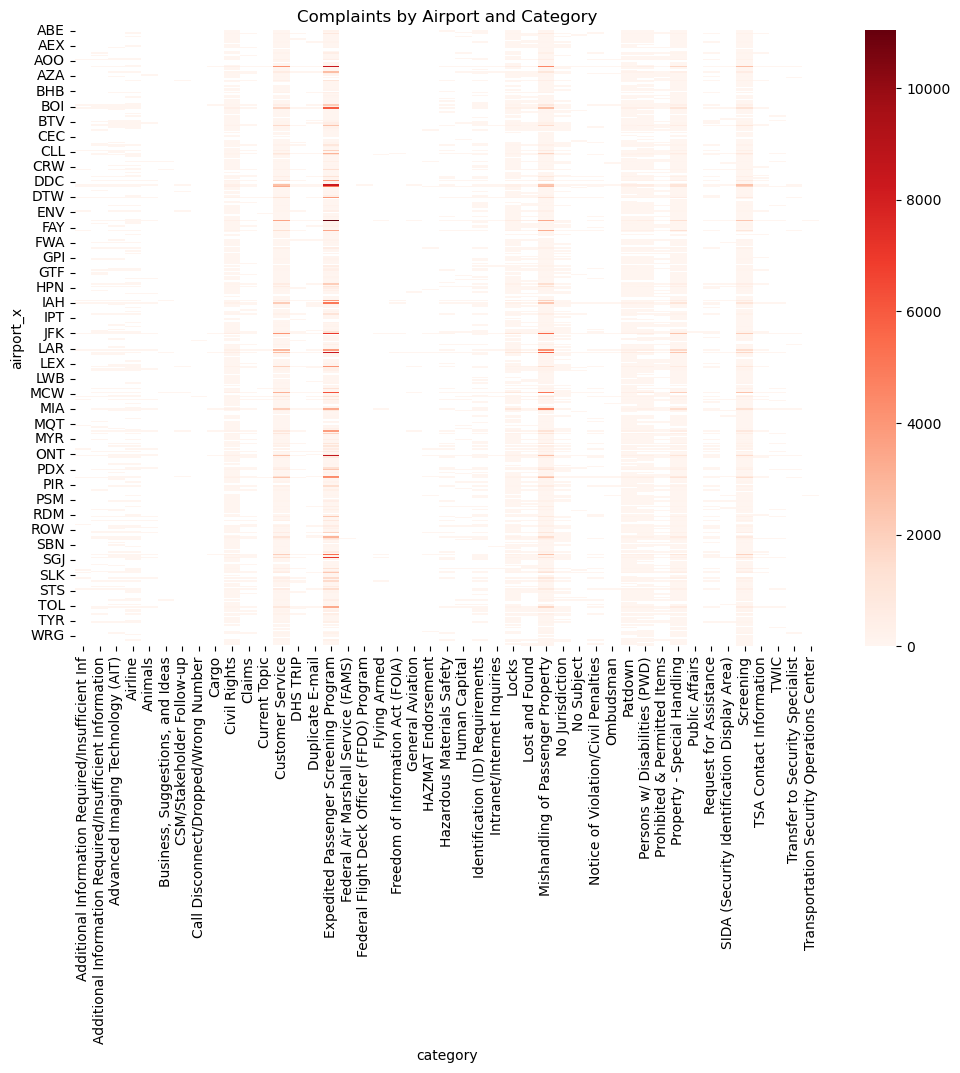

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = merged_complaints_cat.pivot_table(
    index="airport_x",
    columns="category",
    values="count",
    aggfunc="sum"
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="Reds")
plt.title("Complaints by Airport and Category")
plt.show()


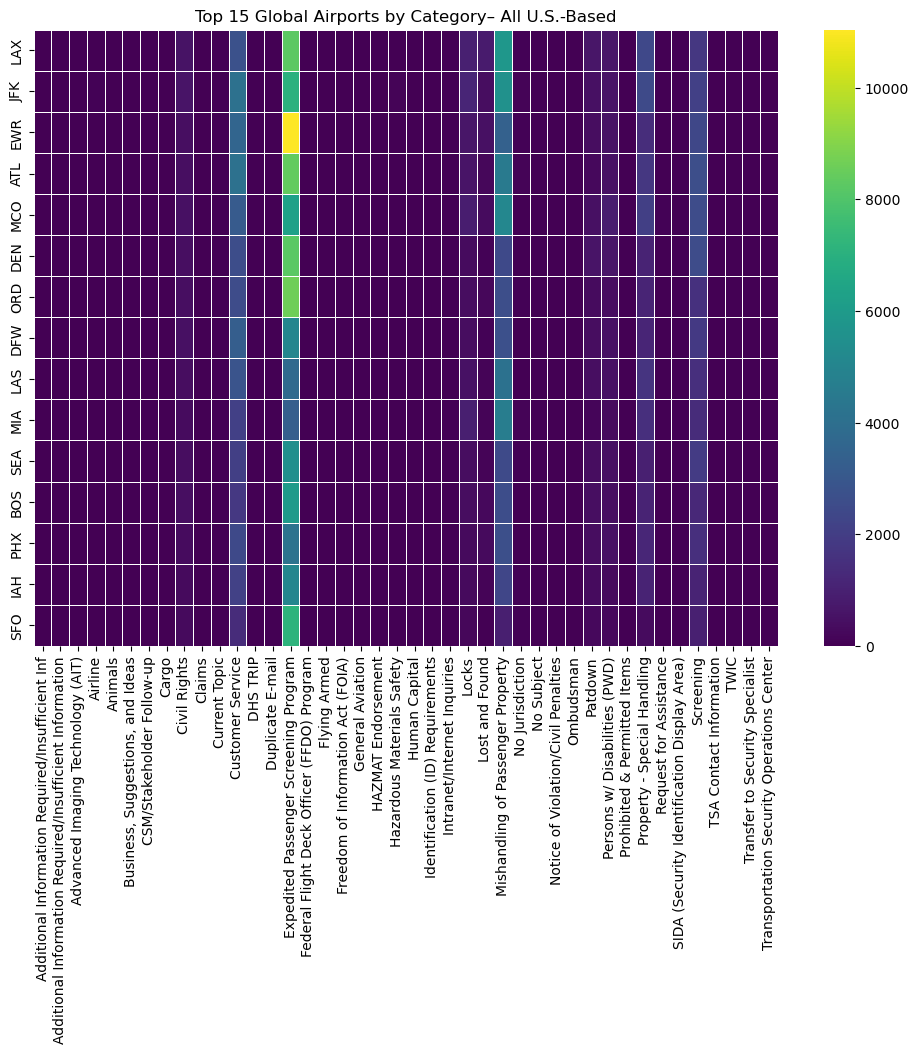

In [30]:
#need to clean up that heatmap its too busy 

top_airports = (
    merged_complaints_cat.groupby("airport_x")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

filtered = merged_complaints_cat[
    merged_complaints_cat["airport_x"].isin(top_airports)
]

pivot = filtered.pivot_table(
    index="airport_x",
    columns="category",
    values="count",
    aggfunc="sum"
).fillna(0)

pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="viridis", linewidths=0.5)
plt.title("Top 15 Global Airports by Category– All U.S.-Based")
plt.xlabel("")   # removes X-axis label
plt.ylabel("")   # removes Y-axis label
plt.show()


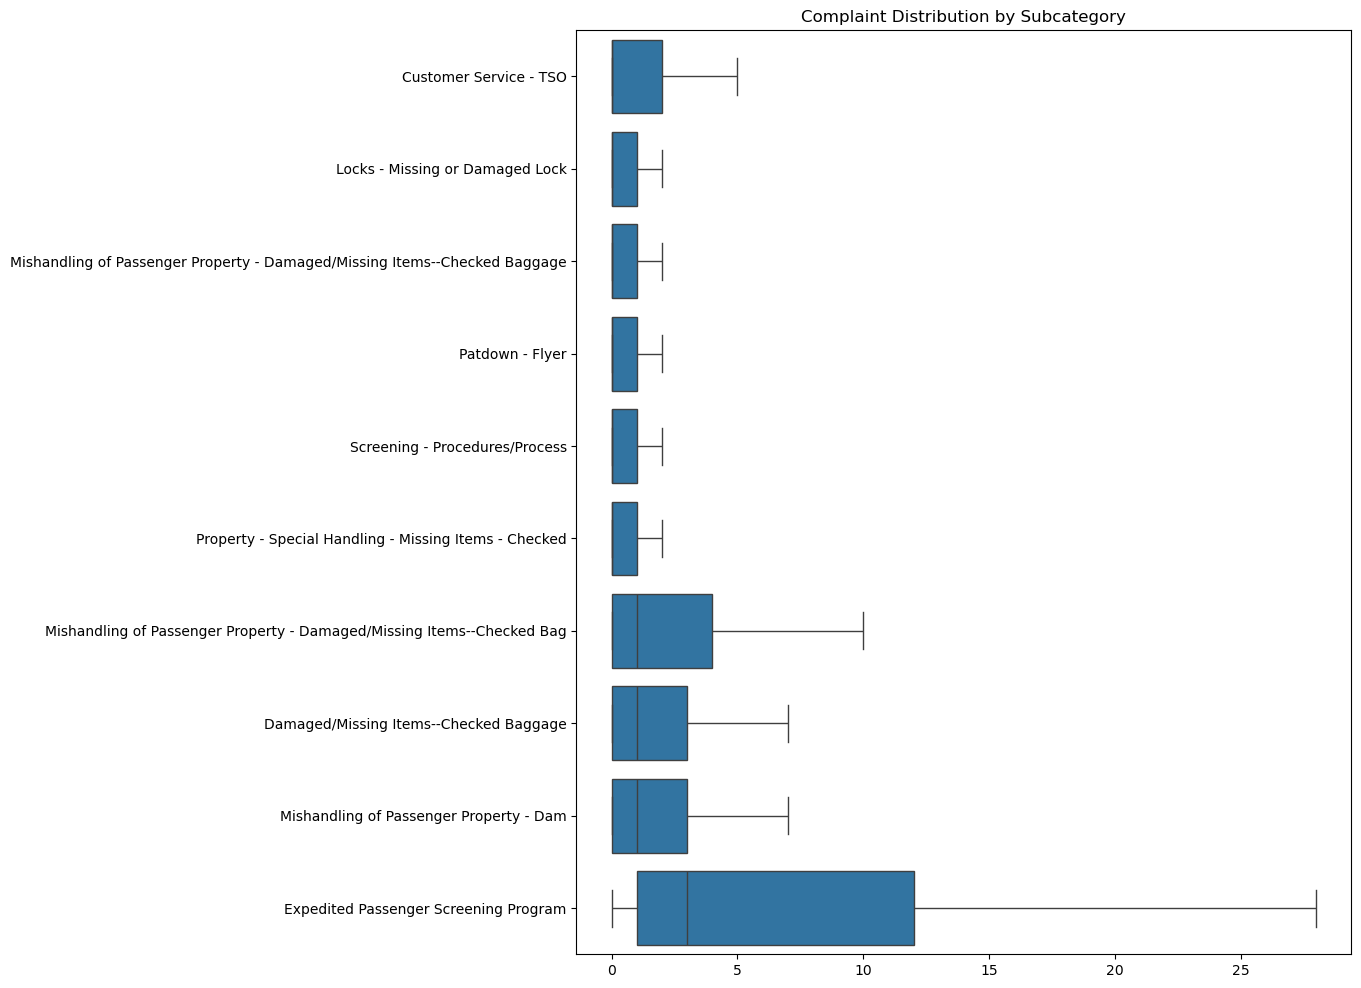

In [17]:
top_subcats = (
    merged_complaints_subcat.groupby("subcategory")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

filtered = merged_complaints_subcat[
    merged_complaints_subcat["subcategory"].isin(top_subcats)
]

order = (
    filtered.groupby("subcategory")["count"]
    .median()
    .sort_values(ascending=True)
    .index
)

plt.figure(figsize=(10,12))

sns.boxplot(
    data=filtered,
    y="subcategory",
    x="count",
    order=order,
    showfliers=False
)

plt.xlabel("")   # remove x label
plt.ylabel("")   # remove y label

plt.title("Complaint Distribution by Subcategory")
plt.show()



In [18]:
airport_counts = (
    merged_complaints_cat
    .groupby(["airport_x", "latitude", "longitude"])["count"]
    .sum()
    .reset_index()
)

import plotly.express as px

fig = px.scatter_geo(
    airport_counts,
    lat="latitude",
    lon="longitude",
    size="count",
    color="count",
    hover_name="airport_x",
    color_continuous_scale="Reds",
    title="Total Complaints by Airport",
    width=1000,
    height=600
)

fig.show()


In [19]:
merged_complaints_airport.head(2)

pdf_report_date airport_x year_month  count country_code   region_name iata  \
0         2019-02       ABE    2015-01      0           US  Pennsylvania  ABE   
1         2019-02       ABE    2015-02      0           US  Pennsylvania  ABE   

   icao                            airport_y  latitude  longitude  
0  KABE  Lehigh Valley International Airport   40.6521   -75.4408  
1  KABE  Lehigh Valley International Airport   40.6521   -75.4408

C:\Users\samkl\AppData\Local\Temp\ipykernel_15996\1256489040.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




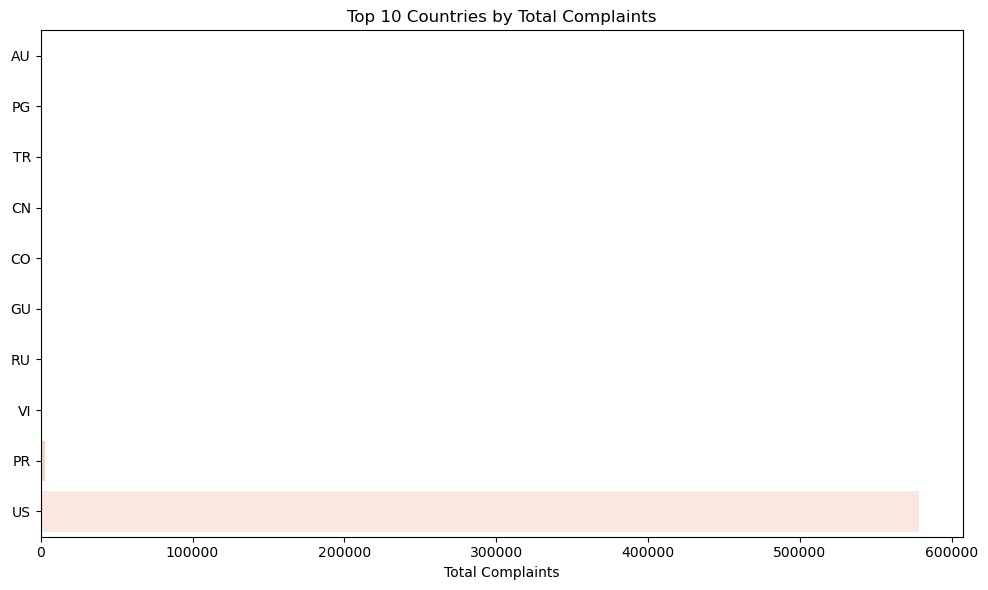

In [20]:
country_counts = (
    merged_complaints_airport
    .groupby("country_code")["count"]
    .sum()
    .reset_index()
)

top10 = (
    country_counts
    .sort_values("count", ascending=False)
    .head(10)
    .sort_values("count", ascending=True)
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.barplot(
    data=top10,
    x="count",
    y="country_code",
    palette="Reds_r"
)

plt.title("Top 10 Countries by Total Complaints")
plt.xlabel("Total Complaints")
plt.ylabel("")
plt.tight_layout()
plt.show()

#I need to reduce the number of categories here, its all the USA


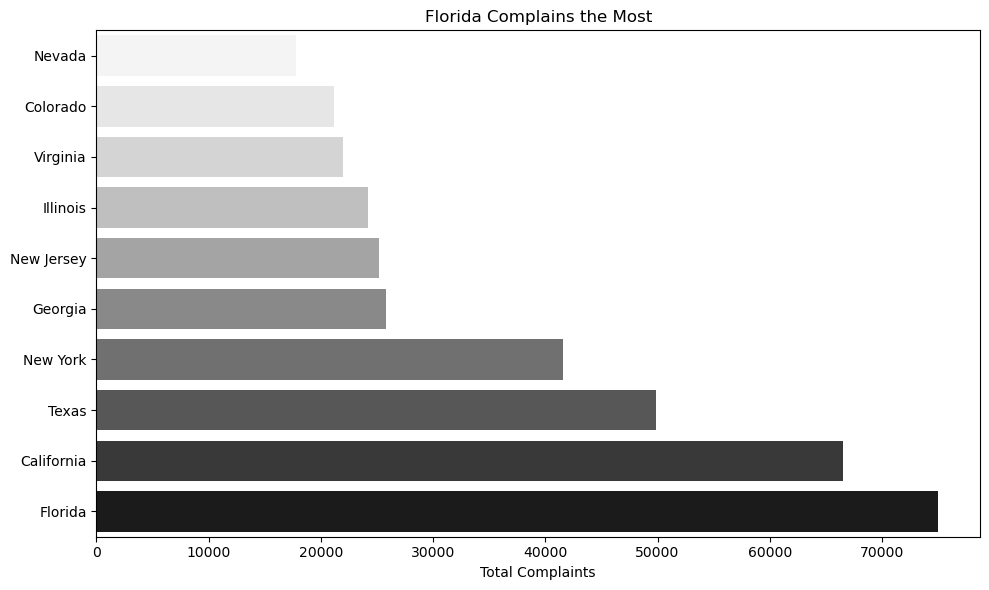

In [21]:
us_data = merged_complaints_airport[
    merged_complaints_airport["country_code"] == "US"
]

state_counts = (
    us_data
    .groupby("region_name")["count"]
    .sum()
    .reset_index()
)

top10_states = (
    state_counts
    .sort_values("count", ascending=False)
    .head(10)
    .sort_values("count", ascending=True)
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.barplot(
    data=top10_states,
    x="count",
    y="region_name",
    hue="region_name",
    palette="Greys",
    legend=False
)

plt.title("Florida Complains the Most")
plt.xlabel("Total Complaints")
plt.ylabel("")
plt.tight_layout()
plt.show()


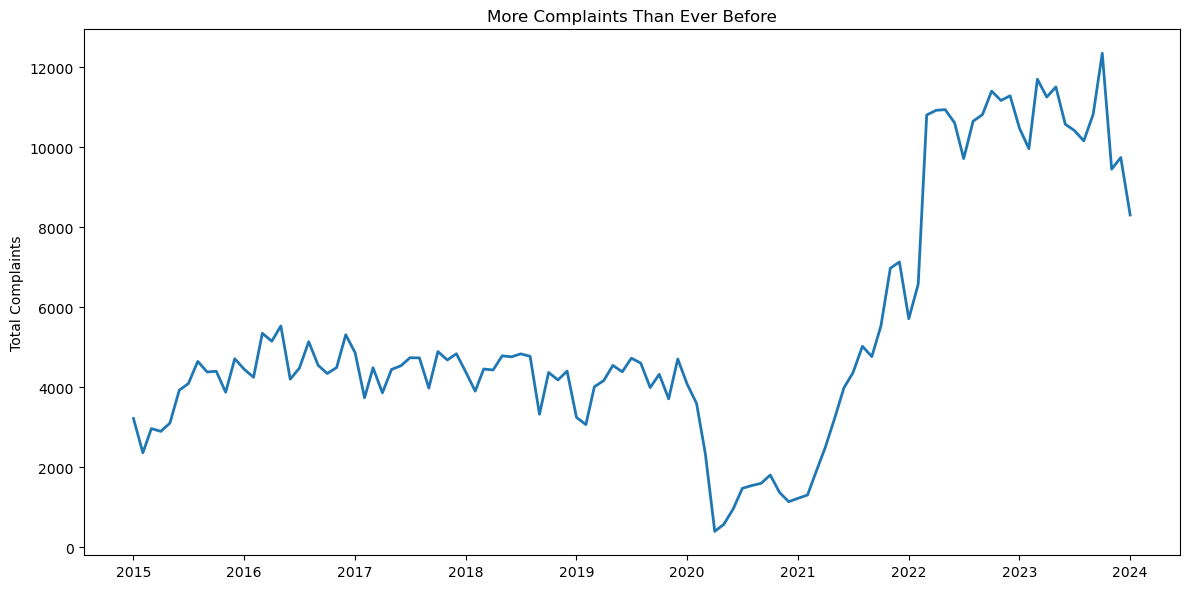

In [23]:
df = merged_complaints_airport.copy()

# Convert properly (YYYY-MM format)
df["year_month"] = pd.to_datetime(
    df["year_month"],
    format="%Y-%m",
    errors="coerce"
)

monthly_totals = (
    df.groupby("year_month")["count"]
      .sum()
      .reset_index()
      .sort_values("year_month")
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

sns.lineplot(
    data=monthly_totals,
    x="year_month",   # FIXED
    y="count",
    linewidth=2
)

plt.title("More Complaints Than Ever Before")
plt.xlabel("")
plt.ylabel("Total Complaints")
plt.tight_layout()
plt.show()


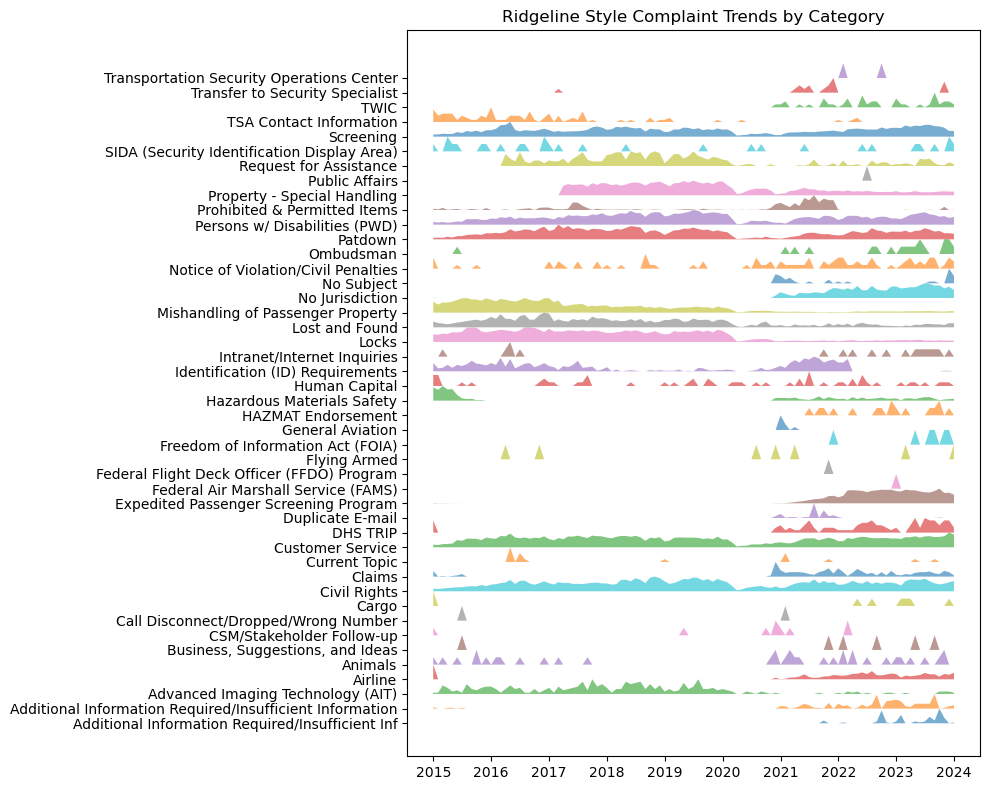

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = merged_complaints_cat.copy()

# Convert date
df["year_month"] = pd.to_datetime(df["year_month"])

# Pivot for ridgeline effect
pivot_df = df.pivot_table(
    index="year_month",
    columns="category",
    values="count",
    aggfunc="sum"
).fillna(0)

# Normalize (optional for shape comparison)
pivot_df = pivot_df / pivot_df.max()

plt.figure(figsize=(10,8))

for i, col in enumerate(pivot_df.columns):
    plt.fill_between(
        pivot_df.index,
        pivot_df[col] + i,
        i,
        alpha=0.6
    )

plt.yticks(range(len(pivot_df.columns)), pivot_df.columns)
plt.title("Ridgeline Style Complaint Trends by Category")
plt.tight_layout()
plt.show()


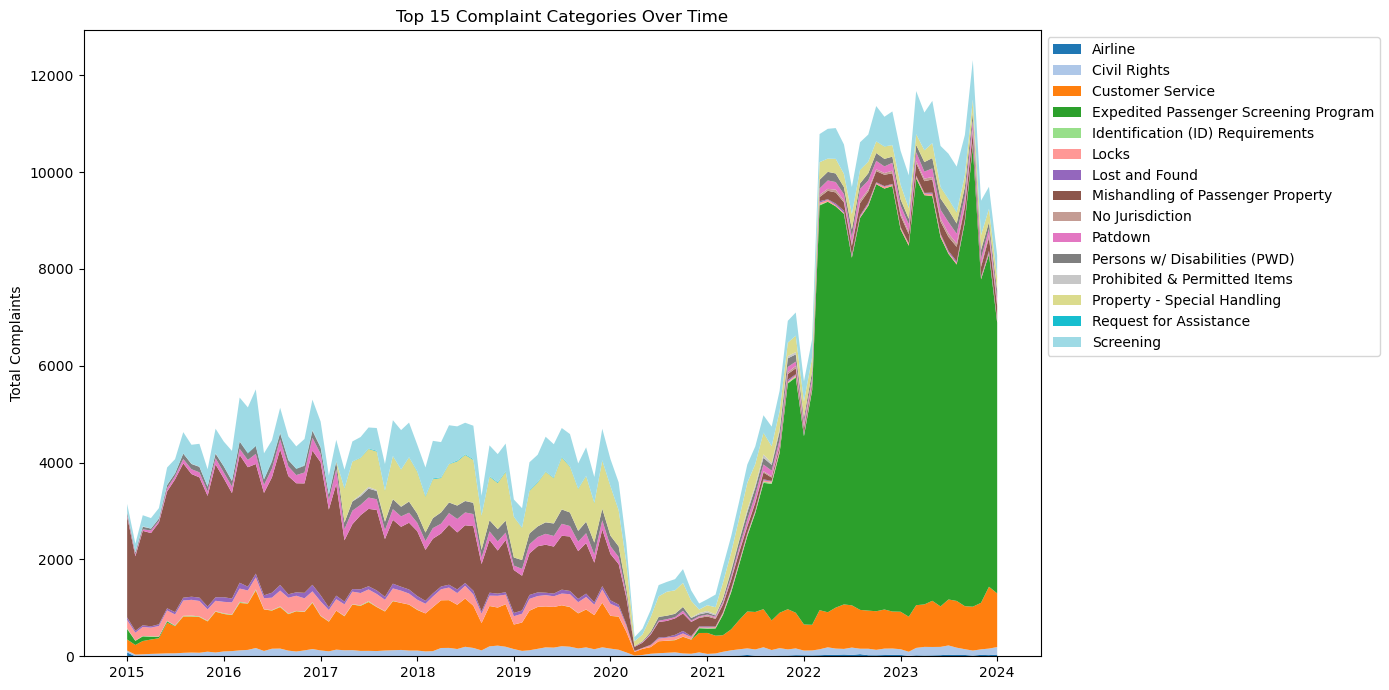

In [27]:
import pandas as pd

df = merged_complaints_cat.copy()

# Make sure count is numeric
df["count"] = pd.to_numeric(df["count"], errors="coerce")

# Get top 15 categories by total volume
top15 = (
    df.groupby("category")["count"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
      .index
)

# Filter dataframe to reduce number of categories to top 15
df_top15 = df[df["category"].isin(top15)].copy()


import matplotlib.pyplot as plt
import numpy as np

categories = pivot_df.columns
num_categories = len(categories)

# Generate distinct colors
colors = plt.cm.tab20(np.linspace(0, 1, num_categories))

plt.figure(figsize=(14,7))

plt.stackplot(
    pivot_df.index,
    pivot_df.T,
    labels=categories,
    colors=colors
)

plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.title("Top 15 Complaint Categories Over Time")
plt.ylabel("Total Complaints")
plt.tight_layout()
plt.show()
